# Exam 3

In [1]:
%matplotlib inline
import numpy as np
from scipy.misc import factorial, comb
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

## Problem 1

In [3]:
n_samples = 50000
x = np.random.uniform(low=0, high=2, size=n_samples)
y = np.random.uniform(low=0, high=2, size=n_samples)
z = x * y

In [4]:
# simuations results
z_mean_simu = np.mean(z)
z_var_simu = np.var(z, ddof=1)
z_prob_simu = np.sum(z >= 1)/n_samples

print("Simulation: Mean of z: {0}; Var of z: {1}".format(z_mean_simu, z_var_simu))
print("Simulation: P(z>1):{0}".format(z_prob_simu))

Simulation: Mean of z: 1.002789758930366; Var of z: 0.7806097497993898
Simulation: P(z>1):0.40582


In [5]:
#Theory
z_mean_theory = 1
z_var_theory = 7/9
z_prob_theory = 3/8

print("Theory: Mean of z: {0}; Var of z: {1}".format(z_mean_theory, z_var_theory))
print("Theory: P(z>1):{0}".format(z_prob_theory))

Theory: Mean of z: 1; Var of z: 0.7777777777777778
Theory: P(z>1):0.375


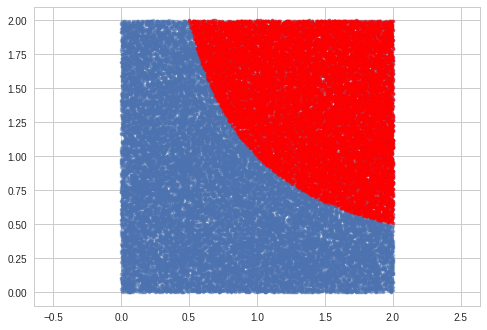

In [6]:
plt.plot(x, y, '.', alpha=0.5)
plt.axis('equal')
x_valid = x[z>=1]
y_valid = y[z>=1]
plt.plot(x_valid, y_valid, 'r.', alpha=0.5)

In [7]:
1/4*(3-2*np.log(2))

0.40342640972002736

## Problem 2: Busy signal

In [112]:
0.1/(0.001*0.9 + 1*0.1)

0.9910802775024777

In [113]:
1 - .9 * .001

0.9991

## Problem 3: Weight fluctuation


In [8]:
num_simu = 50000
weight_gain_list = []
for idx in range(num_simu):
    wt_array = np.random.uniform(low=-0.5, high=+0.5, size=50)
    wt_gain = np.sum(wt_array)
    weight_gain_list.append(wt_gain)
weight_gain_list = np.array(weight_gain_list)    

In [9]:
num_succ = np.sum(weight_gain_list >= 3)
prob_simu = num_succ/num_simu
print("Simulation: P(wt >=3)={0}".format(prob_simu))

Simulation: P(wt >=3)=0.07192


In [10]:
prob_theory = 1-0.9292
print("Theory: P(wt >=3)={0}".format(prob_theory))

Theory: P(wt >=3)=0.07079999999999997


## Problem 4: Maximum likelihood estimation

Proof:
https://math.stackexchange.com/questions/693070/shifted-exponential-distribution-and-mle

Confidence intervals:
https://stats.stackexchange.com/questions/99337/confidence-interval-for-the-shift-parameter-of-a-non-central-exponential-distr

Shifted exponential exam:
http://www3.ul.ie/~mlc/support/Exam%20Solutions/2009-2010%20SOLNS/Autumn/2009-2010%20Statistical%20Inference%20MS4214%20exam%20solutions.pdf

Pivotal quantity and confidence intervals:
https://www.stat.tamu.edu/~hart/611/CI.pdf

Full example with pivot:
http://www.stat.cmu.edu/~larry/=stat705/Lecture11.pdf

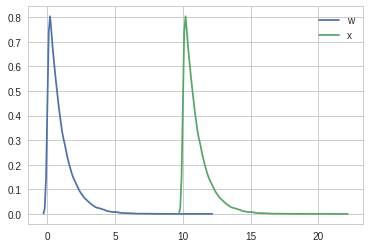

In [43]:
n_samples = 50000
theta = 10
w = np.random.exponential(scale=1.0, size=n_samples)
x = theta + w
y = np.random.exponential(scale = 11, size=n_samples)
sns.distplot(w, hist=False, label='w')
sns.distplot(x, hist=False, label='x')

In [45]:
print(np.mean(x))
print(np.mean(w))

11.0024936983
1.00249369827


In [49]:
p = 0.5
k = 0
n = 9
comb(n,k) * p**k *(1-p)**(n-k)

0.001953125

In [53]:
#np.log(1-0.95)/(-10)
#1-np.exp(-10) = 0.95
#np.exp(-10x) = 1-0.95
np.log(1-0.95)/(-10)

0.29957322735539899

In [3]:
np.log(1-0.95)/(-10)

0.29957322735539899


## Problem 5: Office hours

In [56]:
def gen_poisson(l, max_time):
    t = 0
    t_list = []
    done = False
    while not done:
        t += np.random.exponential(scale=1/l)
        if t > max_time:
            done = True
        else:
            t_list.append(t)        
    return t_list

In [69]:
def merge_process(process1, process2, type1, type2):
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1['time'] = process1
    df1['student'] = type1
    df2['time'] = process2
    df2['student'] = type2
    df = pd.concat((df1, df2))
    df = df.sort_values(by='time')
    df['arrival'] = 1
    return df

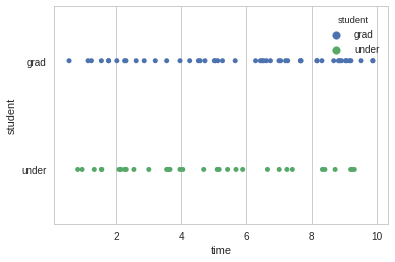

In [72]:
sns.stripplot('time', y='student',  hue='student', data=df)

### (1) What is the probability that exactly three undergraduates arrive between 10:00 pm and 10:30 pm?

In [108]:
l_u = 3
l_g = 5

proc1 = gen_poisson(l_u, 200)
proc2 = gen_poisson(l_g, 200)
df = merge_process(proc1, proc2, 'under', 'grad')

In [109]:
df.head()

,time,student,arrival
0,0.325150,grad,1
1,0.357226,grad,1
2,0.380744,grad,1
3,0.391139,grad,1
0,0.508293,under,1


In [110]:
time_vals = df.time.values
student_vals = df.student.values
max_time = time_vals[-1]

#for time in time_vals:
num_under_three = 0
num_simu = 0
for time in df.time.values:
    start_time = time
    end_time = time + 0.5
    df_tmp = df.loc[(df.time > start_time) & (df.time <= end_time)]
    num_under = np.sum(df_tmp.student == 'under')
    num_simu += 1
    if num_under == 3:
        num_under_three +=1

print("Simu: {0}".format(num_under_three/num_simu))        

Simu: 0.11477488902980343


In [111]:
lambda_u = 3
tau = 0.5
k = 3
p = (lambda_u * tau)**(k) * np.exp(-lambda_u*tau)/ factorial(k)
print(p)

0.125510715083


### (4) Given that the professor is currently talking with an undergraduate, what is the probability that 5 of the next 7 students to arrive will be undergraduates?


In [39]:
comb(7,5) *(3/8)**5 * (5/8)**2

0.060832500457763672

## Problem 6: Markov chain


In [4]:
def gen_next_state(cur_state):
    if cur_state == 1:
        next_state = np.random.choice([1, 2, 3], p=[3/4, 1/4, 0])
    elif cur_state == 2:
        next_state = np.random.choice([1, 2, 3], p=[3/8, 1/4, 3/8])
    elif cur_state == 3:
        next_state = np.random.choice([1, 2, 3], p=[0, 1/4, 3/4])
    return next_state

### Find the probability that X2=3.

In [13]:
def simulate_chain(start_state, num_steps):
    out_states = []
    cur_state = start_state
    for idx in range(num_steps):
        next_state = gen_next_state(cur_state)
        out_states.append(next_state)
        cur_state = next_state
    return out_states

In [14]:
num_simu = 50000
num_succ = 0
for idx in range(num_simu):
    tmp_simu = simulate_chain(start_state=1, num_steps=2)
    if tmp_simu[1] == 3:
        num_succ += 1

print("Simu: P(X2=3) = {0}".format(num_succ/num_simu))
print("Theory: P(X2=3) = {0}".format(1/4*3/8))

Simu: P(X2=3) = 0.09358
Theory: P(X2=3) = 0.09375


### Find the probability that the process is in state 3 immediately after the second change of state. (A “change of state" is a transition that is not a self-transition.) 

In [15]:
def simulate_second_change_of_state(start_state=1):
    cur_state = start_state
    out_states = [cur_state]
    while len(out_states) < 3:
        next_state = gen_next_state(cur_state)
        if next_state != cur_state:
            out_states.append(next_state)
        cur_state = next_state
    return out_states

In [25]:
num_simu = 10000
num_succ = 0
for idx in range(num_simu):
    tmp_simu = simulate_second_change_of_state(start_state=1)
    if tmp_simu[2] == 3:
        num_succ += 1

print("Simu: P(second state change=3) = {0}".format(num_succ/num_simu))
print("Theory: P(second state change=3) = {0}".format(1/2))

Simu: P(second state change=3) = 0.5027
Theory: P(second state change=3) = 0.5


### Find (approximately) P(X1000=2∣X1000=X1001)

In [17]:
# A= [
#     [3/4, 1/4, 0],
#     [3/8, 1/4, 3/8],
#     [0, 1/4, 3/4]
# ]
# f = np.array(A)
# for idx in range(20):
#     f = np.dot(f, A)
# f

In [18]:
num_succ = 0
num_match = 0
num_simu = 5000
for idx in range(num_simu):
    tmp_simu = simulate_chain(start_state=1, num_steps=50)
    if tmp_simu[-1] == tmp_simu[-2]:
        num_match += 1
        if tmp_simu[-2] == 2:
            num_succ += 1

print("Simu: P(X1000) = {0}".format(num_succ/num_match))
p1 = 3/8
p2 = 1/4
p3 = 3/8

num = p2 * 1/4
den = (p1*3/4 + p2*1/4 + p3*3/4)
num/den
print("Theory: P(X1000) = {0}".format(num/den))

Simu: P(X1000) = 0.0985691573926868
Theory: P(X1000) = 0.1


### Let T be the first time that the state is equal to 3.

In [14]:
def time_until_3(start_state=1):
    cur_state = start_state
    next_state = gen_next_state(cur_state)
    num_steps = 1 
    while next_state != 3:
        cur_state = next_state
        next_state = gen_next_state(cur_state)
        num_steps += 1
    return num_steps

In [15]:
num_simu = 10000
num_steps = []
for idx in range(num_simu):
    num_steps.append(time_until_3(start_state=1))

print("Simu: E[T] = {0}".format(np.mean(num_steps)))
print("Theory: E[T] = {0}".format(32/3))

Simu: E[T] = 10.7708
Theory: E[T] = 10.666666666666666


### Suppose for this part of the problem that the process starts instead at state 2, i.e., X0=2. Let S be the first time by which both states 1 and 3 have been visited.

In [29]:
def time_until_13(start_state=2):
    cur_state = start_state
    path = [cur_state]
    while not((1 in path) and (3 in path)):
        next_state = gen_next_state(cur_state)
        path.append(next_state)
        cur_state = next_state
    print(path)
    return len(path)-1

In [30]:
time_until_13()

[2, 3, 3, 3, 2, 1]


5

In [17]:
def time_until(start_state=1, end_state=3):
    cur_state = start_state
    next_state = gen_next_state(cur_state)
    num_steps = 1 
    while next_state != end_state:
        cur_state = next_state
        next_state = gen_next_state(cur_state)
        num_steps += 1
    return num_steps

In [25]:
tmp_time = []
for idx in range(10000):
    tmp_time.append(time_until(start_state=3, end_state=1))
print(np.mean(tmp_time))

10.7635


In [7]:
num_simu = 15000
num_steps_13 = []
for idx in range(num_simu):
    num_steps_13.append(time_until_13(start_state=2))

print("Simu: E[S] = {0}".format(np.mean(num_steps_13)))

# t23 = 20/3
# t13 = 32/3
# theory_len13 = 1 + 3/8*t13 + 3/8*t23
# print("Theory: E[S] = {0}".format(theory_len13))

Simu: E[S] = 11.969733333333334


In [34]:
t23 = 20/3
t13 = 32/3
S = (t23 + t13)*2*3/8
print(S)

13.0


In [10]:
2*(3/8*20/3 + 1/4 * 4 + 3/8*20/3)

12.0